Q4: How does pay rate/salary relate to employment duration? Do employees who are paid more/less have longer/shorter tenures than others? How does this vary across boroughs, departments, and job title?

In [7]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('payroll.csv')
df.head(5)

C:\Users\Ebrahim.Azarisooreh\AppData\Local\Temp\ipykernel_16592\4117121575.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('payroll.csv')


,Fiscal Year,Payroll Number,Agency Name,Last Name,First Name,Mid Init,Agency Start Date,Work Location Borough,Title Description,Leave Status as of June 30,Base Salary,Pay Basis,Regular Hours,Regular Gross Paid,OT Hours,Total OT Paid,Total Other Pay
0,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,NaN,08/10/2015,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
1,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,M,09/12/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
2,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,NaN,02/22/2016,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
3,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,D,09/16/2013,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0
4,2020,17.0,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,P,04/30/2018,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0


In [9]:
joi = [
    'CERTIFIED APPLICATIONS DEVELOPER',
    'PHYSICAL THERAPIST',
    'ADMINISTRATIVE ASSISTANT',
    'ASSISTANT PROFESSOR',
    'POLICE OFFICER',
    'EXECUTIVE DIRECTOR',
    'CONSTRUCTION PROJECT MANAGER',
    'ATTORNEY AT LAW',
    'RESEARCH SCIENTIST',
    '*SCHOOL LUNCH HELPER'
]


start = df['Agency Start Date'].dropna().apply(lambda x: 1999 if x[-4] == 9999 else x)
start = pd.to_datetime(start, format='%m/%d/%Y', errors='coerce').to_frame()
today = df['Fiscal Year'].dropna().apply(lambda x: f"1/1/{x}")
today = pd.to_datetime(today, format='%m/%d/%Y', errors='coerce').to_frame()

date_pairs = today.join(start)
df['Employment Duration'] = date_pairs.apply(lambda x: x['Fiscal Year'] - x['Agency Start Date'], axis=1)

Text(0.5, 1.0, 'Job Title by Hourly Rate and Employment Duration')

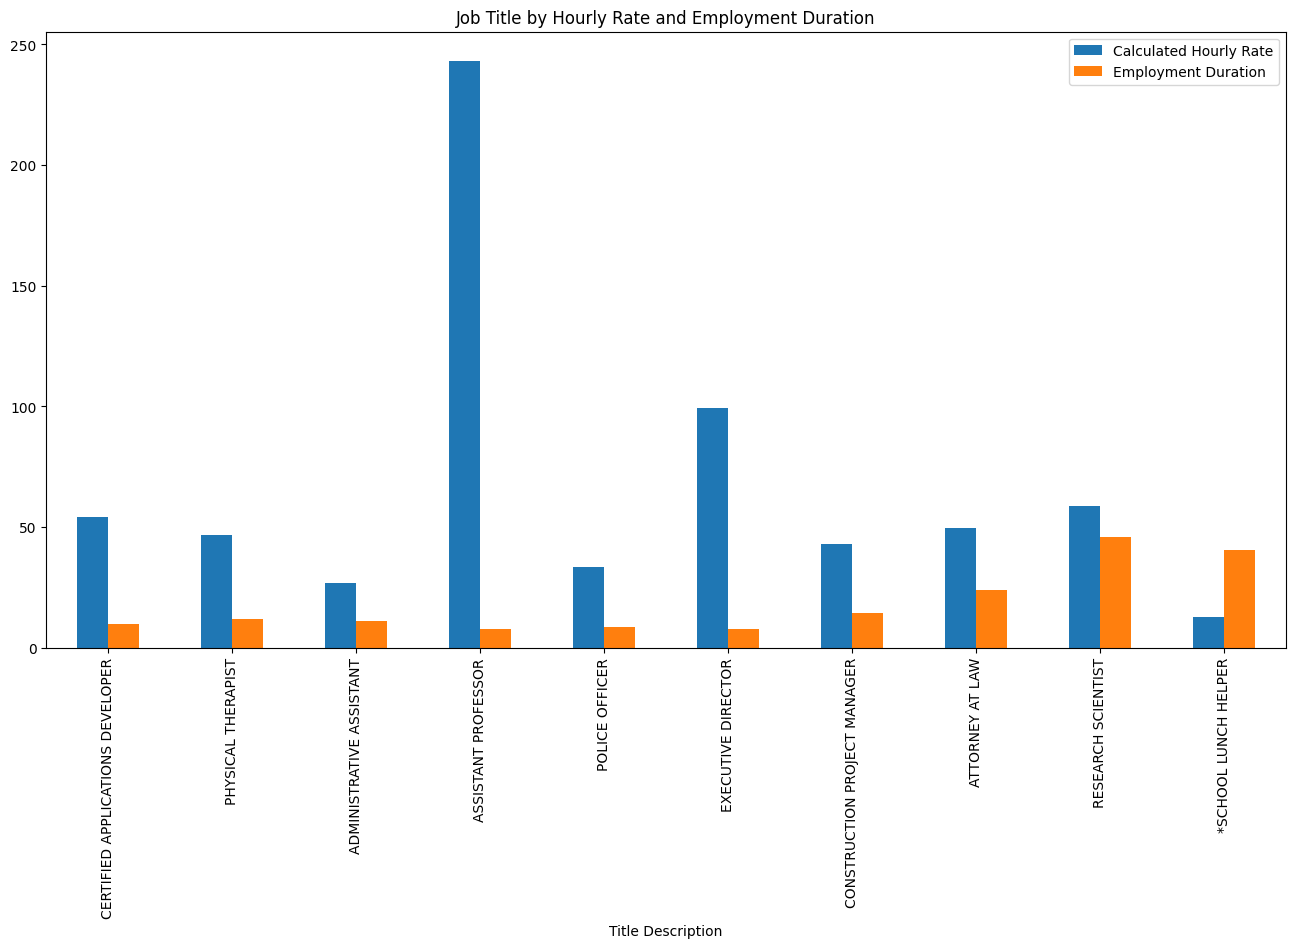

In [10]:
duration_by_job = df.groupby(['Title Description'])['Employment Duration'].mean().loc[joi]
duration_by_job = duration_by_job.dt.days / 365

# calculate hourly pay for each object, group them by job title, and calculate mean pay by title
df['Calculated Hourly Rate'] = df['Regular Gross Paid'] / df['Regular Hours'].apply(lambda x: np.inf if x <= 0 else x)
titles = df.groupby(['Title Description'])['Calculated Hourly Rate'].mean()

pay_by_title = titles.loc[joi]
pay_title_duration = pay_by_title.to_frame().join(duration_by_job)
pay_title_duration.plot(kind='bar', figsize=(16, 8))
plt.title('Job Title by Hourly Rate and Employment Duration')

In [11]:
pay_title_duration

,Calculated Hourly Rate,Employment Duration
Title Description,,
CERTIFIED APPLICATIONS DEVELOPER,54.225710,9.654795
PHYSICAL THERAPIST,46.814248,11.778082
ADMINISTRATIVE ASSISTANT,26.654464,10.854795
ASSISTANT PROFESSOR,243.151009,7.641096
POLICE OFFICER,33.502342,8.512329
EXECUTIVE DIRECTOR,99.229449,7.750685
CONSTRUCTION PROJECT MANAGER,43.093192,14.219178
ATTORNEY AT LAW,49.546127,23.849315
RESEARCH SCIENTIST,58.551501,45.742466


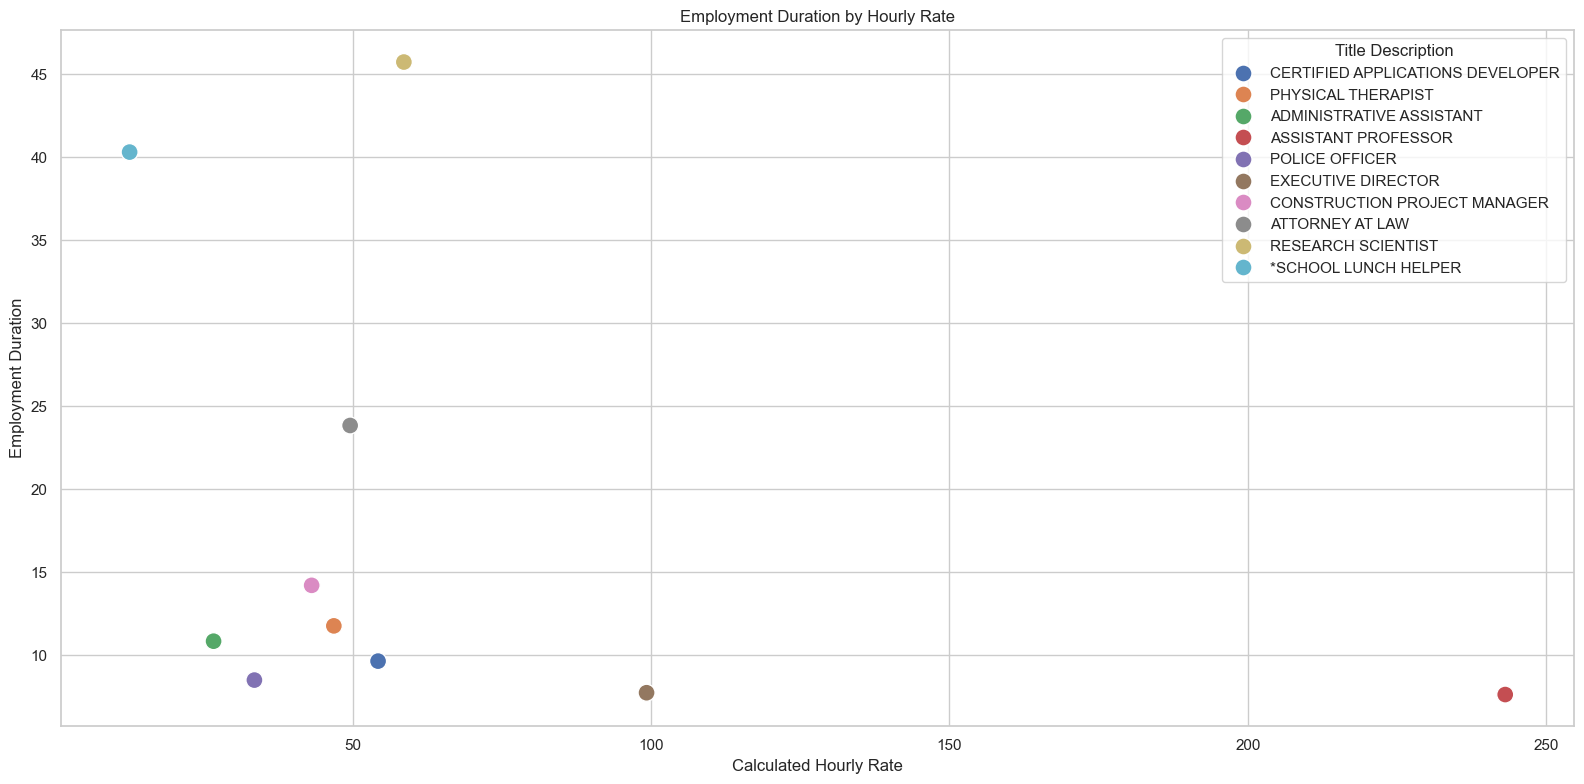

In [12]:
df = pay_title_duration.reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df,
    x='Calculated Hourly Rate',
    y='Employment Duration',
    hue='Title Description',
    s = 150
)

plt.title('Employment Duration by Hourly Rate')
plt.tight_layout()
plt.show()